In [ ]:
!pip install pip install bubbly

  Created wheel for bubbly: filename=bubbly-1.0.2-cp36-none-any.whl size=5429 sha256=cf311eeb1879acbd417110da356956add0225c69d266b59ad81f80b9d786f192
  Stored in directory: /root/.cache/pip/wheels/cf/3c/75/8c09dbf7cd6b320b69a6bc679fd111abd1139866c722b1476b
Successfully built bubbly


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,roc_curve, auc
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from datetime import datetime
from datetime import timedelta
from datetime import date
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
from bubbly.bubbly import bubbleplot
import plotly.offline as py
import plotly.graph_objs as go

In [ ]:
data=pd.read_csv('student_performance_fianl_finishedStudentCourse.csv')
data1=pd.read_csv('export (3) (1).csv')

In [ ]:
data=data.rename(columns={'p.id':'student_id','p.updatedAt':'updatedAt',	'p.createdAt':'createdAt',	's.averageOneToOneProcessingTime':'averageOneToOneProcessingTime',	's.numberOfCompletedSkills':'numberOfCompletedSkills',	's.numberOfUnlockedOneToOneMeetings':'numberOfUnlockedOneToOneMeetings',	's.numberOfCompletedWorkshops':'numberOfCompletedWorkshops',	's.averageCheckpointScore':'averageCheckpointScore',	's.numberOfUnlockedWorkshops':'numberOfUnlockedWorkshops',	's.averageLearningScore':'averageLearningScore',	's.numberOfCompletedOneToOneMeetings':'numberOfCompletedOneToOneMeetings',	's.numberOfBookedOneToOneMeetings':'numberOfBookedOneToOneMeetings',	's.numberOfUnlockedCheckpoints':'numberOfUnlockedCheckpoints',	's.averageOneToOneMeetingScore':'averageOneToOneMeetingScore',	's.numberOfCompletedCheckpoints':'numberOfCompletedCheckpoints',	's.averageCheckpointProcessingTime':'averageCheckpointProcessingTime',	't.assessmentsCount':'assessmentsCount',	't.workshopCount':'workshopCount',	't.checkpointCount':'checkpointCount',	't.oneToOneCount':'oneToOneCount',	't.name':'track_name',	'p.lastLoginDate':'lastLoginDate'})
data1=data1.rename(columns={'p.id':'student_id','p.updatedAt':'updatedAt',	'p.createdAt':'createdAt',	's.averageOneToOneProcessingTime':'averageOneToOneProcessingTime',	's.numberOfCompletedSkills':'numberOfCompletedSkills',	's.numberOfUnlockedOneToOneMeetings':'numberOfUnlockedOneToOneMeetings',	's.numberOfCompletedWorkshops':'numberOfCompletedWorkshops',	's.averageCheckpointScore':'averageCheckpointScore',	's.numberOfUnlockedWorkshops':'numberOfUnlockedWorkshops',	's.averageLearningScore':'averageLearningScore',	's.numberOfCompletedOneToOneMeetings':'numberOfCompletedOneToOneMeetings',	's.numberOfBookedOneToOneMeetings':'numberOfBookedOneToOneMeetings',	's.numberOfUnlockedCheckpoints':'numberOfUnlockedCheckpoints',	's.averageOneToOneMeetingScore':'averageOneToOneMeetingScore',	's.numberOfCompletedCheckpoints':'numberOfCompletedCheckpoints',	's.averageCheckpointProcessingTime':'averageCheckpointProcessingTime',	't.assessmentsCount':'assessmentsCount',	't.workshopCount':'workshopCount',	't.checkpointCount':'checkpointCount',	't.oneToOneCount':'oneToOneCount',	't.name':'track_name',	'p.lastLoginDate':'lastLoginDate'})

In [ ]:
# data1[data1['t.name']=='Introduction to Artificial Intelligence - Summer Academy']

In [ ]:
data.drop(columns={'Unnamed: 0', 'Unnamed: 0.1','month', 'day', 'complete_the_course','completed_skill','p.professionalExperienceLength', 'p.status','p.rating', 'p.numberOfGains',
       'p.typeOfStudy'},inplace=True)

In [ ]:
# data1.drop(columns={'lastLoginDate'},inplace=True)

In [ ]:
data=data.loc[(data['track_name']!='Employability') & (data['track_name']!='Game3-Don\'t use please - old version') & (data['track_name']!='Kickoff GOMYCODE online - old') & (data['track_name']!='Introduction to Artificial Intelligence - (Don\'t use) (LS)') & (data['track_name']!='SOFT SKILLS')]
data.index=np.arange(data.shape[0])
data1=data1.loc[(data1['track_name']!='Employability') & (data1['track_name']!='Game3-Don\'t use please - old version') & (data1['track_name']!='Kickoff GOMYCODE online - old') & (data1['track_name']!='Introduction to Artificial Intelligence - (Don\'t use) (LS)') & (data1['track_name']!='SOFT SKILLS')]
data1.index=np.arange(data1.shape[0])

In [ ]:
data['duration']=pd.NA
data.loc[data['track_name'].str.contains('- Summer Academy'),'duration']=3
data.loc[data['track_name'].str.contains('stack',regex=False, case=False),'duration']=16
data.loc[pd.isna(data['duration']),'duration']=12
data1['duration']=pd.NA
# data1.loc[data1['track_name'].str.contains('- Summer Academy'),'duration']=3
# data1.loc[data1['track_name'].str.contains('stack',regex=False, case=False),'duration']=16
# data1.loc[pd.isna(data1['duration']),'duration']=12
data1=data1[(data1['track_name'].str.contains('- Summer Academy')&(data1['lastLoginDate'].str[7]=='8'))]
data1.index=np.arange(data1.shape[0])

In [ ]:
data.head()

,student_id,updatedAt,createdAt,averageOneToOneProcessingTime,numberOfCompletedSkills,numberOfUnlockedOneToOneMeetings,numberOfCompletedWorkshops,averageCheckpointScore,numberOfUnlockedWorkshops,averageLearningScore,numberOfCompletedOneToOneMeetings,numberOfBookedOneToOneMeetings,numberOfUnlockedCheckpoints,averageOneToOneMeetingScore,numberOfCompletedCheckpoints,averageCheckpointProcessingTime,assessmentsCount,workshopCount,checkpointCount,oneToOneCount,track_name,lastLoginDate,completed_course1,duration
0,16f6d880-803b-4aec-84f2-7ac8b0bbf763,2020-06-30T11:48:49.0606217+01:00,2020-06-30T11:48:49.0606202+01:00,0.000000e+00,4,0,0,0.000000,0,1.000000,0,0,0,0.000000,0,0.000000e+00,91,4,6,4,Game 01 : Introduction to Game Development,2020-07-29,1,12
1,be67883c-720a-474c-b1d2-ecb2b817156f,2020-06-08T11:17:02.1402436+01:00,2020-06-08T11:17:02.1402413+01:00,5.510238e+05,116,1,0,0.633333,3,0.628103,2,2,1,0.857143,2,1.023979e+06,287,32,36,32,Become a Full-Stack Web Developer (June 2020) ...,2020-07-03,1,16
2,6c307e45-2e21-4630-9f60-c824d5f38688,2020-05-03T13:40:46.9526207+01:00,2020-05-03T13:40:46.9526185+01:00,1.570246e+06,314,0,1,0.937500,5,0.987006,3,3,0,0.833333,8,7.029992e+05,81,7,10,6,IA 01: Introduction to Artificial Intelligence,2020-08-05,0,12
3,950588ce-d399-4352-8f82-e1982f327a88,2020-03-14T10:31:58.3622666+01:00,2020-03-14T10:31:58.3622643+01:00,0.000000e+00,23,1,0,0.000000,1,1.000000,0,0,1,0.000000,0,0.000000e+00,112,5,6,5,Introduction to Web Development (LS),2020-03-14,1,12
4,71d9c5f8-f532-42c6-88b4-22e6fd8ce233,2020-07-21T15:04:14.1884839+01:00,2020-07-21T15:04:14.1884812+01:00,0.000000e+00,40,0,0,1.000000,6,1.000000,0,6,4,0.000000,2,3.457969e+05,15,6,6,6,The Scratch programming language,2020-08-04,0,12


In [ ]:
data.loc[data['completed_course1']==0,'completed_course1']=2
data.loc[data['completed_course1']==1,'completed_course1']=0
data.loc[data['completed_course1']==2,'completed_course1']=1

In [ ]:
data['completed_course1'].value_counts()

0    674
1    360
Name: completed_course1, dtype: int64

In [ ]:
data['learning_rate']=pd.NA
datee=data['createdAt'].str[0:10]
for i in range(len(datee)):
  datee[i]=date.today()-datetime.strptime(datee[i], '%Y-%m-%d').date()+timedelta(weeks=data['duration'][i])
  datee[i]=datee[i].days/7
  datee[i]=datee[i]/data['duration'][i]
data1['learning_rate']=pd.NA
datee1=data1['lastLoginDate'].str[1:11]
for i in range(len(datee1)):
  # print(i)
  datee1[i]=date.today()-datetime.strptime(datee1[i], '%Y-%m-%d').date()
  datee1[i]=datee1[i].days//7
datee1

0      2
1      4
2      2
3      2
4      2
      ..
138    4
139    2
140    3
141    3
142    4
Name: lastLoginDate, Length: 143, dtype: object

In [ ]:
data['learning_rate']=datee
data1['duration']=datee1

In [ ]:
data.loc[data['learning_rate']>1,'learning_rate']=1

In [ ]:
data.columns

Index(['student_id', 'updatedAt', 'createdAt', 'averageOneToOneProcessingTime',
       'numberOfCompletedSkills', 'numberOfUnlockedOneToOneMeetings',
       'numberOfCompletedWorkshops', 'averageCheckpointScore',
       'numberOfUnlockedWorkshops', 'averageLearningScore',
       'numberOfCompletedOneToOneMeetings', 'numberOfBookedOneToOneMeetings',
       'numberOfUnlockedCheckpoints', 'averageOneToOneMeetingScore',
       'numberOfCompletedCheckpoints', 'averageCheckpointProcessingTime',
       'assessmentsCount', 'workshopCount', 'checkpointCount', 'oneToOneCount',
       'track_name', 'lastLoginDate', 'completed_course1', 'duration',
       'learning_rate'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



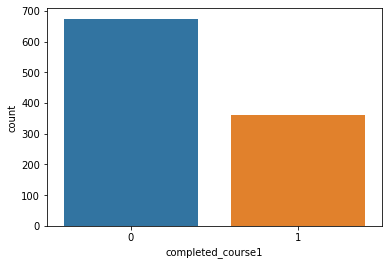

In [ ]:
import seaborn as sns
sns.countplot(data['completed_course1'])

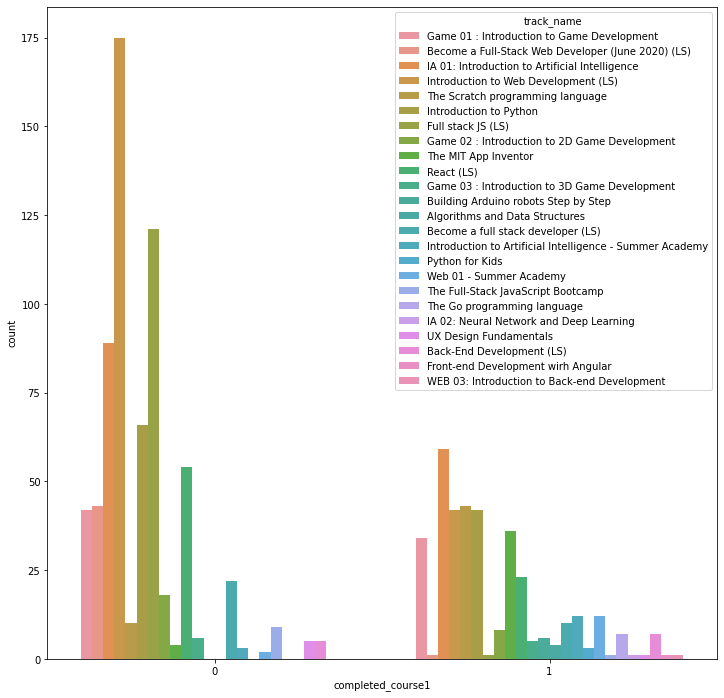

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x='completed_course1', hue='track_name',data=data)

In [ ]:
data_not_finished=data.loc[data['completed_course1']==0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

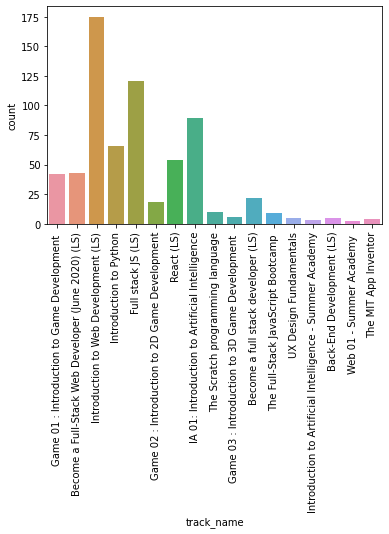

In [ ]:
sns.countplot(data=data_not_finished,x='track_name')
plt.xticks(rotation='90')

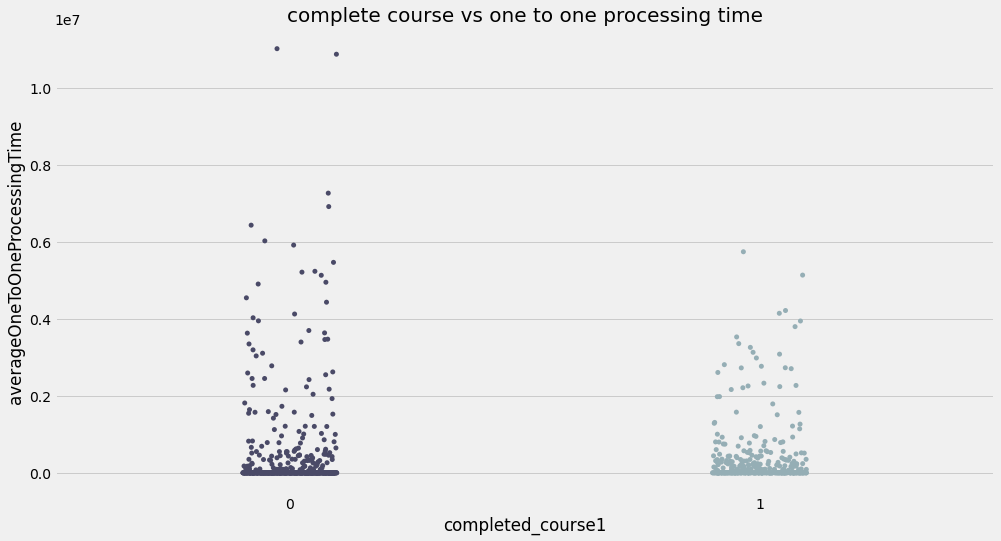

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
sns.stripplot(data['completed_course1'], data['averageOneToOneProcessingTime'], palette = 'bone')
plt.title('complete course vs one to one processing time', fontsize = 20)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = data, x_column = 'averageCheckpointProcessingTime', y_column = 'averageCheckpointScore', 
    bubble_column = 'completed_course1', color_column = 'completed_course1', 
    x_title = "Annual Policy Premium", y_title = "Total Claim Amount",time_column = 'completed_course1', title = 'Annual Premium vs Total Claim Amount vs Months as Customer',
    x_logscale = False, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom': True})

In [ ]:
trace = go.Scatter3d(
    x = data['averageCheckpointProcessingTime'],
    y = data['averageLearningScore'],
    z = data['averageCheckpointScore'],
    mode = 'markers',
    marker = dict(
         size = 10,
         color = data['averageLearningScore']
    )
)

df = [trace]

layout = go.Layout(
    title = 'Cholestrol vs Heart Rate vs Age',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Property_claim'),
            zaxis = dict(title  = 'Vehicle_claim')
        )
    
)
fig = go.Figure(data = df, layout=layout)
py.iplot(fig)

In [ ]:
le = preprocessing.LabelEncoder()
data['track_name']=le.fit_transform(data['track_name'])
data1['track_name']=le.fit_transform(data1['track_name'])

In [ ]:
data_to_predict=data.drop(columns={'lastLoginDate','student_id',	'updatedAt', 'createdAt'})
data_to_predict1=data1.drop(columns={'lastLoginDate','student_id'})

In [ ]:
len(data.columns)

25

In [ ]:
selector = SelectFromModel(estimator=LogisticRegression()).fit(data_to_predict.drop(columns={'completed_course1'}), data_to_predict['completed_course1'])
selector.get_support()

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False])

In [ ]:
data_to_predict.columns

Index(['averageOneToOneProcessingTime', 'numberOfCompletedSkills',
       'numberOfUnlockedOneToOneMeetings', 'numberOfCompletedWorkshops',
       'averageCheckpointScore', 'numberOfUnlockedWorkshops',
       'averageLearningScore', 'numberOfCompletedOneToOneMeetings',
       'numberOfBookedOneToOneMeetings', 'numberOfUnlockedCheckpoints',
       'averageOneToOneMeetingScore', 'numberOfCompletedCheckpoints',
       'averageCheckpointProcessingTime', 'assessmentsCount', 'workshopCount',
       'checkpointCount', 'oneToOneCount', 'track_name', 'completed_course1',
       'duration', 'learning_rate'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(selector.transform(data_to_predict.drop(columns={'completed_course1'})), data_to_predict['completed_course1'], test_size=0.3, random_state=32)
lr = LogisticRegression().fit(X_train, y_train)
labels_lr=lr.predict(X_test)
lr.score(X_test, y_test)

0.8231511254019293

In [ ]:
r_auc=roc_auc_score(y_test, labels_lr)
print(r_auc)

0.8066769438288852


In [ ]:
confusion_matrix(y_test, labels_lr)

array([[182,  32],
       [ 23,  74]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_to_predict.drop(columns={'completed_course1'}), data_to_predict['completed_course1'], test_size=0.3, random_state=32)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
labels_gnb=gnb.predict(X_test)

In [ ]:
gn_auc=roc_auc_score(y_test, labels_gnb)
print(gn_auc)

0.6342374024472494


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, labels_gnb))

Accuracy: 0.7138263665594855


In [ ]:
confusion_matrix(y_test, labels_gnb)

array([[181,  33],
       [ 56,  41]])

In [ ]:
print(classification_report(y_test, labels_gnb))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       214
           1       0.55      0.42      0.48        97

    accuracy                           0.71       311
   macro avg       0.66      0.63      0.64       311
weighted avg       0.70      0.71      0.70       311



In [ ]:
data_to_predict.columns

Index(['averageOneToOneProcessingTime', 'numberOfCompletedSkills',
       'numberOfUnlockedOneToOneMeetings', 'numberOfCompletedWorkshops',
       'averageCheckpointScore', 'numberOfUnlockedWorkshops',
       'averageLearningScore', 'numberOfCompletedOneToOneMeetings',
       'numberOfBookedOneToOneMeetings', 'numberOfUnlockedCheckpoints',
       'averageOneToOneMeetingScore', 'numberOfCompletedCheckpoints',
       'averageCheckpointProcessingTime', 'assessmentsCount', 'workshopCount',
       'checkpointCount', 'oneToOneCount', 'track_name', 'completed_course1',
       'duration', 'learning_rate'],
      dtype='object')

In [ ]:
selector = SelectFromModel(estimator=RandomForestClassifier()).fit(data_to_predict.drop(columns={'completed_course1'}), data_to_predict['completed_course1'])
selector.get_support()

array([False,  True, False, False, False,  True,  True, False,  True,
       False, False,  True, False,  True, False,  True, False,  True,
       False, False])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(SelectFromModel(estimator=RandomForestClassifier()).fit_transform(data_to_predict.drop(columns={'completed_course1'}), data_to_predict['completed_course1']), data_to_predict['completed_course1'], test_size=0.3, random_state=32)
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf = rf.fit(X_train, y_train)
labels_rf=rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, labels_rf))

Accuracy: 0.9614147909967846


In [ ]:
rf_auc=roc_auc_score(y_test, labels_rf)
print(rf_auc)

0.9635080450910493


In [ ]:
confusion_matrix(y_test, labels_rf)

array([[205,   9],
       [  3,  94]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_to_predict.drop(columns={'completed_course1'}), data_to_predict['completed_course1'], test_size=0.3, random_state=32)
eclf1 = VotingClassifier(estimators=[ ('lr', lr), ('rf', rf), ('gnb', gnb)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
predictions=eclf1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions.round()))

Accuracy: 0.8360128617363344


In [ ]:
np.array_equal(eclf1.named_estimators_.lr.predict(X_test),eclf1.named_estimators_['lr'].predict(X_test))

True

In [ ]:
eclf2 = VotingClassifier(estimators=[ ('lr', lr), ('rf', rf), ('gnb', gnb)],voting='soft')
eclf2 = eclf2.fit(X_train, y_train)
predictions=eclf2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))


Accuracy: 0.9035369774919614


In [ ]:
eclf3 = VotingClassifier(estimators=[ ('lr', lr), ('rf', rf), ('gnb', gnb)],voting='soft', weights=[2,4,1],flatten_transform=True)
eclf3 = eclf3.fit(X_train, y_train)
predictions=eclf3.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.9517684887459807


In [ ]:
confusion_matrix(y_test, predictions)

array([[202,  12],
       [  3,  94]])

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       214
           1       0.89      0.97      0.93        97

    accuracy                           0.95       311
   macro avg       0.94      0.96      0.95       311
weighted avg       0.95      0.95      0.95       311



In [ ]:
r_fpr, r_tpr, _ = roc_curve(y_test, labels_lr)
rf_fpr, rf_tpr, _ = roc_curve(y_test, labels_rf)
nb_fpr, nb_tpr, _ = roc_curve(y_test, labels_gnb)

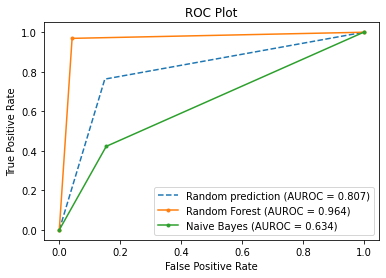

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % gn_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()